In [ ]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import scikitplot as skplt
from sklearn.preprocessing import StandardScaler, RobustScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
data_set='/work/creditcard.csv'
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [ ]:
def dataset_summary(train_X, test_X, train_y, test_y):
    print()
    print("---------Dataset Summary----------")
    print("Total training samples:", len(train_X))
    print("Total training samples corresponding to class 0:", len(train_y[train_y[:]==0]))
    print("Total training samples corresponding to class 1:", len(train_y[train_y[:]==1]))
    print()
    print("Total testing samples:", len(test_X))
    print("Total testing samples corresponding to class 0:", len(test_y[test_y[:]==0]))
    print("Total testing samples corresponding to class 1:", len(test_y[test_y[:]==1]))
    print("----------------------------------")
    print()

In [ ]:
# MODELING(SVM with Scikit-learn)
def SVM_model(X_train,y_train, test_X):
    classifier = svm.SVC(kernel='linear', gamma='auto', C=2)
    classifier.fit(X_train, y_train)
    y_predict = classifier.predict(test_X)
    return y_predict

In [ ]:
def oversampling(X, y):
    print("doing over sampling....")
    oversample = RandomOverSampler(sampling_strategy='minority')
    X_over, y_over = oversample.fit_resample(X, y)
    return X_over, y_over

In [ ]:
def undersampling(X, y):
    print("doing under sampling....")
    undersample = RandomUnderSampler(sampling_strategy='majority')
    X_under, y_under = undersample.fit_resample(X, y)
    return X_under, y_under

In [ ]:
def Sampling(X,y,strategy="over"):
    if(strategy == "over"):
        return oversampling(X,y)
    elif(strategy == "under"):
         return undersampling(X,y)
    else:
         return X,y

In [ ]:
def evaluate(test_y, y_pred): 
    #doubt 
    #y_pred = y_pred >= 0.5
        
    print()
    print("Classification Report:")
    print(classification_report(test_y, y_pred))
        
    cf_matrix = confusion_matrix(test_y, y_pred)
        
    print()
    print("Confusion Matrix:")
    print(cf_matrix)
    print ("Accuracy : ",accuracy_score(test_y,y_pred)*100)
    sns.heatmap(cf_matrix, annot=True, fmt='g')
        
    plt.show()

In [ ]:
#importing the data

def read_dataset(csv_file_path,isSampling=False,isScaling=False ,test_size=0.2, random_state=100):
    df = pd.read_csv(csv_file_path)
    df = df.drop(['Amount','Time'], axis=1)
    
    y = df['Class']
    X = df.drop(['Class'], axis=1)
    
    if isSampling:
        print("With Sampling")
        X,y=Sampling(X,y)
    else:
        print("Without Sampling")
    
    #random state is for reproducing the same training and testing set,if we do not use this then
    #every time it will give different sets

    #spliting the data set into training and testing set
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = test_size, random_state=random_state)
    
    if isScaling:
        print("MinMax Scalling is done")
        #MinMax scaling
        scaler = MinMaxScaler()
        train_X = scaler.fit_transform(train_X)
        test_X = scaler.transform(test_X)
    
    return train_X, test_X, train_y, test_y

With Sampling
doing under sampling....

---------Dataset Summary----------
Total training samples: 787
Total training samples corresponding to class 0: 386
Total training samples corresponding to class 1: 401

Total testing samples: 197
Total testing samples corresponding to class 0: 106
Total testing samples corresponding to class 1: 91
----------------------------------


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       106
           1       0.96      0.88      0.92        91

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197


Confusion Matrix:
[[103   3]
 [ 11  80]]
Accuracy :  92.89340101522842


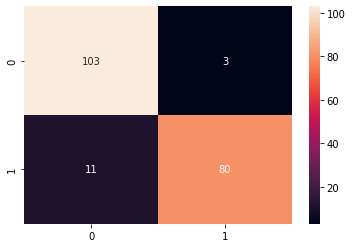

In [ ]:
if __name__ == '__main__':
    
    # train_X, test_X, train_y, test_y = read_dataset("creditcard.csv")
    
     train_X, test_X, train_y, test_y = read_dataset(data_set,True)
     dataset_summary(train_X, test_X, train_y, test_y)
    
    # checkpoint_path = "checkpoints/cp-{epoch:04d}.ckpt"
    # checkpoint_dir = os.path.dirname(checkpoint_path)
    
     y_predict = SVM_model(train_X, train_y, test_X)

     evaluate(test_y, y_predict)

    #model.train(batch_size=16, epochs=4, checkpoint_path=checkpoint_path)
    # model.load(checkpoint_dir)
    #model.evaluate()
     '''
    ####################### Just for testing###############
     plot_roc("Train Baseline", train_X, train_y, color=colors[0])
     plot_roc("Test Baseline", test_X, test_y, color=colors[0], linestyle='--')
     plt.legend(loc='lower right')
     '''

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=920001f5-8a05-4b55-92fa-5a8f292e2307' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>